# E se o computador pudesse aprender a decidir?

- Machine Learning
- Árvore de decisão
- Scikitlearn
- Treino e teste
- Matriz de confusão
- Rede neuronal

<img src="imgs/ml_vs_traditional_paradigm.png" width="600" style="float:left">

In [105]:
import pandas as pd

dados = pd.read_csv('credito-101.csv')
dados

salário   garantia   empréstimo  decisão
0      1700      10000        30000      sim
1       800       5000        20000      sim
2      1800       8000       170000      não
3       900       4000       200000      não
4      5000      10000       150000      sim
5       600      20000        20000      sim
6      2700       1000       160000      não
7       900       1000        15000      não
8      7000       1000        50000      sim
9      1600       5000        20000      sim
10     3000        500       170000      não
11      900      10000       200000      não
12     5000      15000       120000      sim
13      600       1000         2000      sim
14      700       1000       150000      não
15      800       2000        30000      não

## Olhar para os dados

- histograma
- gráfico de dispersão
- gráfico de correlação entre as variáveis descritivas e a variável objetivo

## Separar a descrição dos casos (X) da variável objetivo (y)

- o **dataframe** que carregámos com os dados vai ser dividido
    - `X` com as variáveis que descrevem os casos
    - `y` com a variável objetivo (a **decisão**)

In [106]:
X = dados[['salário', ' garantia', ' empréstimo']]
X

salário   garantia   empréstimo
0      1700      10000        30000
1       800       5000        20000
2      1800       8000       170000
3       900       4000       200000
4      5000      10000       150000
5       600      20000        20000
6      2700       1000       160000
7       900       1000        15000
8      7000       1000        50000
9      1600       5000        20000
10     3000        500       170000
11      900      10000       200000
12     5000      15000       120000
13      600       1000         2000
14      700       1000       150000
15      800       2000        30000

In [107]:
y = dados[' decisão']
y

0      sim
1      sim
2      não
3      não
4      sim
5      sim
6      não
7      não
8      sim
9      sim
10     não
11     não
12     sim
13     sim
14     não
15     não
Name:  decisão, dtype: object

## E agora: *Machine Learning*

- Aprender um modelo que **imita** os decisores humanos
    - Aprende uma **árvore de decisão**
    - Só aprende o que está nos dados
    - Os dados que para aprender são de **treino**


- Árvore de decisão
    - Pode ser visualizada

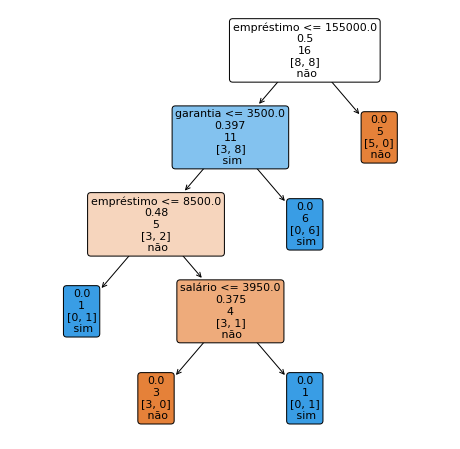

In [108]:
from sklearn import tree
import matplotlib.pyplot as plt


modelo = tree.DecisionTreeClassifier()
modelo.fit(X,y)

plt.figure(figsize=[8, 8])
tree.plot_tree(modelo,
               feature_names=['salário','garantia','empréstimo'],
               class_names=modelo.classes_, label='none',
               filled=True, 
               rounded=True)
plt.show()

## Agora podemos usar o modelo aprendido para decidir se damos o empréstimo

- Fazer uma **previsão**
    - Dar um empréstimo precisa de uma previsão?
    
   

In [109]:
pedido=[[1500,7000,12000]]
modelo.predict(pedido)


array([' sim'], dtype=object)

## Mas afinal o que aprendeu a árvore?

- Só o que estava nos dados
    - Aprendeu a decidir como o gabinete de concessão de crédito
    - Ou, se **decisão** for o resultado do empréstimo (pagou, não pagou)
        - Aprendeu a prever se o cliente **vai pagar**

## Como sabemos se o modelo é bom?

- Como sabemos se um aluno **aprendeu a matéria**?
    - Fazemos um **teste** (ou vários)
    - Usamos casos **não usados no treino**

In [110]:
teste=pd.read_csv('credito-101-teste.csv')
teste

salário   garantia   empréstimo  decisão
0      1900       9000        30000      sim
1       900       4000        22000      sim
2      2300       7000       170000      não
3       900       7000       150000      não
4      4000      10000       160000      sim
5       800      10000        25000      sim
6      3000       1000       150000      não
7       900       1500        15000      não
8      5000       1000        60000      sim
9      1600       5000        20000      sim
10     3200        500       150000      não
11     1100      11000       190000      não
12     4500      13000       120000      sim
13      600       1000         3000      sim
14        0       1000         7000      não
15      100        200         3000      não

In [111]:
X_teste = teste[['salário', ' garantia', ' empréstimo']]
y_teste = teste[' decisão']

y_pred = modelo.predict(X_teste)

## Que nota davas a este aluno?

- certos / perguntas


- Taxa de acerto (**accuracy**)

In [112]:
accuracy = sum(y_pred==y_teste)/len(teste)
accuracy

0.75

## Mas onde errou exatamente?

- Matriz de confusão
    - certos na diagonal principal (DP)
    - errados fora da DP
    

In [113]:
from sklearn.metrics import confusion_matrix

matriz_confusão = confusion_matrix(y_teste, y_pred)

print(matriz_confusão)

[[5 3]
 [1 7]]


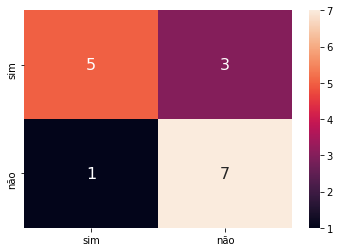

In [114]:
import seaborn as sn

sn.heatmap(matriz_confusão, annot=True, annot_kws={"size": 16},
          xticklabels=['sim','não'], 
          yticklabels=['sim','não'])
plt.show()


## Agora aplicamos uma Rede Neuronal

- Outra abordagem de machine learning
    - Deep learning faz-se com redes neuronais


- Estamos a simplificar muito
    - Os dados deveriam ser **normalizados**


- As redes neuronais podem dar um **resultado diferente** cada vez que aprendem
    - O ponto inicial é escolhido aleatoriamente
    
    
- As redes neuronais são **opacas**
    - Não vemos regras claras como nas árvores de decisão

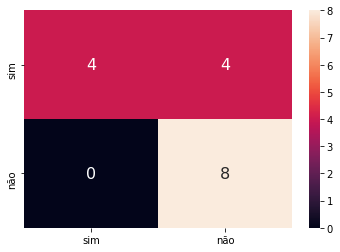

Taxa de acerto (accuracy) = 0.75


In [115]:
from sklearn import neural_network as nn

rede_neuronal = nn.MLPClassifier()
rede_neuronal.fit(X,y)

y_pred=rede_neuronal.predict(X_teste)

matriz_confusão = confusion_matrix(y_teste, y_pred)

sn.heatmap(matriz_confusão, annot=True, annot_kws={"size": 16},
          xticklabels=['sim','não'], 
          yticklabels=['sim','não'])
plt.show()

print("Taxa de acerto (accuracy) =",sum(y_pred==y_teste)/len(teste))